<a href="https://colab.research.google.com/github/MarcoCarnaghi-fi/UNS_Aprendizaje_Maquina_2021/blob/main/TP1_EJ1_Carnaghi_Cuarteto_de_Anscombe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cuarteto de Anscombe

En este notebook vamos a analizar el problema del cuarteto de Anscombe. El cual refiere a 4 conjuntos de puntos con iguales valores estadísticos. Nuestro objetivo es asignar 4 nuevos puntos a su grupo correspondiente, que es único.

In [ ]:
#Para el parsing
import re
#Para recuperar informacion del txt
import requests
#Pandas
import pandas as pd

#Recuperacion de informacion
source_data_url = 'https://raw.githubusercontent.com/fedhere/UInotebooks/master/anscombe.txt'

anscombe_set= requests.get(source_data_url)
ans_txt=anscombe_set.text
ans_txt

"     Anscombe's Quartet     \nAnscombe-Data-Set I I II II III III IV IV  \n X Y X Y X Y X Y  \n 10 8.04 10 9.14 10 7.46 8 6.58  \n 8 6.95 8 8.14 8 6.77 8 5.76  \n 13 7.58 13 8.74 13 12.74 8 7.71  \n 9 8.81 9 8.77 9 7.11 8 8.84  \n 11 8.33 11 9.26 11 7.81 8 8.47  \n 14 9.96 14 8.1 14 8.84 8 7.04  \n 6 7.24 6 6.13 6 6.08 8 5.25  \n 4 4.26 4 3.1 4 5.39 19 12.5  \n 12 10.84 12 9.13 12 8.15 8 5.56  \n 7 4.82 7 7.26 7 6.42 8 7.91  \n 5 5.68 5 4.74 5 5.73 8 6.89  \n          \n 9.00 7.50 9.00 7.50 9.00 7.50 9.00 7.50 Mean \n          \n 10.00 3.75 10.00 3.75 10.00 3.75 10.00 3.75 Variance (Population)\n          \n 0.816  0.816  0.816  0.817  Correlation (Pearson)\n\n\n\n\n"

## Recuperación de información

Los datos estan cargados en formato XY I - XY II- XY III-XY IV.
Es decir, en cada fila tenemos un punto perteneciente a cada conjunto.

In [ ]:
#Recuperamos unicamente las filas que refieren a informacion de los puntos de los conjuntos.
stop_line_num = [x.strip() for x in ans_txt.splitlines()].index('9.00 7.50 9.00 7.50 9.00 7.50 9.00 7.50 Mean')
#print('Stadistics start at {} '.format(stop_line_num))


useful_data = "\n".join(ans_txt.splitlines()[:stop_line_num-1]) # Join use --> https://www.w3schools.com/python/ref_string_join.asp
#useful_data

pattern_anscombe_data     = re.compile(r'(^ +(\d{1,2}) +(-?\d+\.\d{2}?) +(\d{1,2}) +(-?\d+\.\d{2}?) +(\d{1,2}) +(-?\d+\.\d{2}?) +(\d{1,2}) +(-?\d+\.\d{2}?))', re.MULTILINE)
data_tuples = re.findall(pattern_anscombe_data, useful_data)
data_tuples


[(' 10 8.04 10 9.14 10 7.46 8 6.58',
  '10',
  '8.04',
  '10',
  '9.14',
  '10',
  '7.46',
  '8',
  '6.58'),
 (' 8 6.95 8 8.14 8 6.77 8 5.76',
  '8',
  '6.95',
  '8',
  '8.14',
  '8',
  '6.77',
  '8',
  '5.76'),
 (' 13 7.58 13 8.74 13 12.74 8 7.71',
  '13',
  '7.58',
  '13',
  '8.74',
  '13',
  '12.74',
  '8',
  '7.71'),
 (' 9 8.81 9 8.77 9 7.11 8 8.84',
  '9',
  '8.81',
  '9',
  '8.77',
  '9',
  '7.11',
  '8',
  '8.84'),
 (' 11 8.33 11 9.26 11 7.81 8 8.47',
  '11',
  '8.33',
  '11',
  '9.26',
  '11',
  '7.81',
  '8',
  '8.47'),
 (' 6 7.24 6 6.13 6 6.08 8 5.25',
  '6',
  '7.24',
  '6',
  '6.13',
  '6',
  '6.08',
  '8',
  '5.25'),
 (' 12 10.84 12 9.13 12 8.15 8 5.56',
  '12',
  '10.84',
  '12',
  '9.13',
  '12',
  '8.15',
  '8',
  '5.56'),
 (' 7 4.82 7 7.26 7 6.42 8 7.91',
  '7',
  '4.82',
  '7',
  '7.26',
  '7',
  '6.42',
  '8',
  '7.91'),
 (' 5 5.68 5 4.74 5 5.73 8 6.89',
  '5',
  '5.68',
  '5',
  '4.74',
  '5',
  '5.73',
  '8',
  '6.89')]

In [ ]:
pd.set_option("max_rows", 8)              

# crea el dataframe
columns_layers = ['to drop','X I', 'Y I','X II', 'Y II', 'X III', 'Y III', 'X IV', 'Y IV']
df_anscombe = pd.DataFrame(data_tuples, columns = columns_layers) 
df_anscombe = df_anscombe.drop(columns=['to drop'])

types_dict = {'X I': float, 'Y I': float,'X II': float, 'Y II': float, 'X III': float, 'Y III': float, 'X IV': float, 'Y IV': float} 
df_anscombe = df_anscombe.astype(types_dict) 
df_anscombe

,X I,Y I,X II,Y II,X III,Y III,X IV,Y IV
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
...,...,...,...,...,...,...,...,...
5,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
6,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
7,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91
8,5.0,5.68,5.0,4.74,5.0,5.73,8.0,6.89


## Visualización de los datos

La clave en estos casos radica en una correcta visualización de los datos. A pesar de tener iguales valores estadísticos y de regresión. Cada conjunto corresponde a un comportamiento marcadamente distinto. Para poder darnos cuenta de este aspecto una buena alternativa es plotear los datos para su visualización.

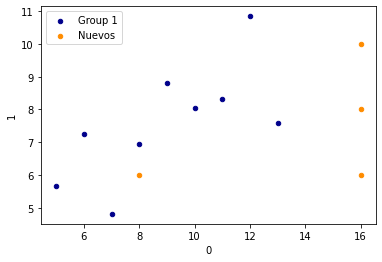

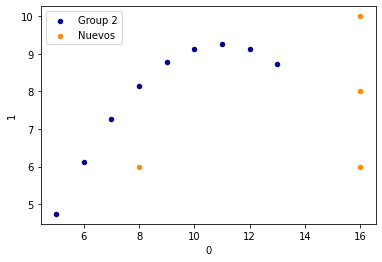

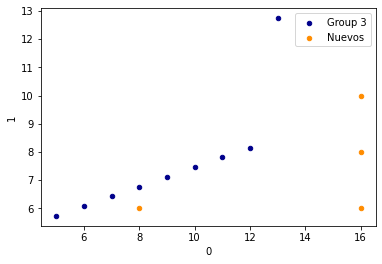

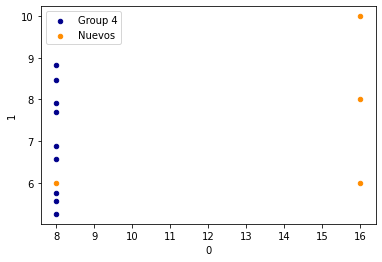

In [ ]:
# Ploteo de datos
import matplotlib.pyplot as plt

#Conjuntos iniciales
x_axis = ['X I', 'X II', 'X III','X IV']
y_axis = ['Y I', 'Y II', 'Y III','Y IV']
ax0= df_anscombe.plot.scatter(x=x_axis[0], y=y_axis[0],color="DarkBlue", label="Group 1")
ax1=df_anscombe.plot.scatter(x=x_axis[1], y=y_axis[1], color="DarkBlue", label="Group 2");
ax2=df_anscombe.plot.scatter(x=x_axis[2], y=y_axis[2], color="DarkBlue", label="Group 3");
ax3=df_anscombe.plot.scatter(x=x_axis[3], y=y_axis[3], color="DarkBlue", label="Group 4");

#Nuevos datos
new_points = [[16.0,8.0],[8.0,6.0],[16.0,10.0],[16.0,6.0]]
df_news = pd.DataFrame(new_points)
df_news[0]

df_news.plot.scatter(x=0, y=1, color='DarkOrange', label='Nuevos', ax=ax0);
df_news.plot.scatter(x=0, y=1, color='DarkOrange', label='Nuevos', ax=ax1);
df_news.plot.scatter(x=0, y=1, color='DarkOrange', label='Nuevos', ax=ax2);
df_news.plot.scatter(x=0, y=1, color='DarkOrange', label='Nuevos', ax=ax3);

En base a la visualización podemos sacar las siguientes conclusiones:

* El conjunto 1 refiere a un conjunto de puntos a la cual podría realizarsele una regresion lineal
* El conjunto 2 refiere a un polinomio de orden 2 o superior
* El conjunto 3 es un caso lineal con un punto anómalo que distorsiona la regresión lineal
* El conjunto 4 corresponde a una recta vertical.

Por lo tanto, vemos que;
* el punto [16,6] pertenece a la clase 2.
*  El punto [8,6] pertenece a la clase 4

Pero el punto [16,8] y [16,10]

<function matplotlib.pyplot.grid>

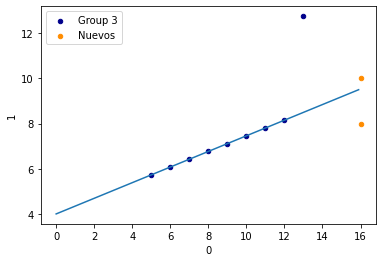

In [ ]:
import matplotlib.pyplot as plt

#Conjunto 3
b = (8.15-6.08)/(12-6)
m = 6.08 - b*6 
x= []
y = []
for i in range(160):
  x.append(0.1*i)
  y.append(b*0.1*i+m)

df_new_doubt = df_news.drop([1,3], axis=0)

plt.figure
ax2=df_anscombe.plot.scatter(x=x_axis[2], y=y_axis[2], color="DarkBlue", label="Group 3");
plt.plot(x,y)
df_new_doubt.plot.scatter(x=0, y=1, color='DarkOrange', label='Nuevos', ax=ax2);
plt.grid

b = [0.62866667], m = 1.9275555555555544


<function matplotlib.pyplot.grid>

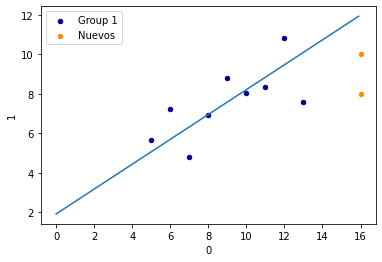

In [ ]:
import numpy as np #Librería numérica
from sklearn.linear_model import LinearRegression #Regresión Lineal con scikit-learn
x = np.array(df_anscombe['X III'].values.tolist())
y = np.array(df_anscombe['Y III'].values.tolist())


regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
# instruimos a la regresión lineal que aprenda de los datos (x,y)
regresion_lineal.fit(x.reshape(-1,1), y) 

# vemos los parámetros que ha estimado la regresión lineal
print('b = ' + str(regresion_lineal.coef_) + ', m = ' + str(regresion_lineal.intercept_))

#Conjunto 1
x= []
y = []
for i in range(160):
  x.append(0.1*i)
  y.append(regresion_lineal.coef_*0.1*i+regresion_lineal.intercept_)

df_new_doubt = df_news.drop([1,3], axis=0)
plt.figure
ax0= df_anscombe.plot.scatter(x=x_axis[0], y=y_axis[0],color="DarkBlue", label="Group 1")
plt.plot(x,y)
df_new_doubt.plot.scatter(x=0, y=1, color='DarkOrange', label='Nuevos', ax=ax0);
plt.grid


La regresion lineal de los conjuntos 1 y 3, no nos arroja información adicional para garantizar la pertenencia de los puntos restantes a uno u otro conjunto